In [1]:
from fastai.vision.all import *
import gradio as gr

/home/kishan/mambaforge/envs/web_project/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/kishan/mambaforge/envs/web_project/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# path = Path('/kaggle/input/sarscov2-ctscan-dataset')


In [3]:
# dls = DataBlock(
#     blocks=(ImageBlock, CategoryBlock),
#     get_items=get_image_files,
#     splitter=RandomSplitter(valid_pct=0.2, seed=42),
#     get_y=parent_label,
#     item_tfms=[Resize(192, method='squish')]
# ).dataloaders(path)

In [4]:
# dls.show_batch(max_n=6)

In [5]:
# learn = vision_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(13)

In [6]:
# learn.export('model.pkl')

In [7]:
# from IPython.display import FileLink
# FileLink(r'model.pkl')

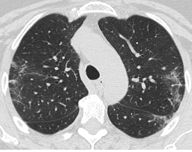

In [8]:
im = PILImage.create('covid.png')
im.thumbnail((192, 192))
im

In [9]:
learn = load_learner('covid_model.pkl')

In [10]:
learn.predict(im)

('COVID', tensor(0), tensor([1.0000e+00, 2.8816e-09]))

In [11]:
categories = ('COVID', 'NON_COVID')
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [12]:
classify_image(im)

{'COVID': 1.0, 'NON_COVID': 2.881642036101084e-09}

In [ ]:
image = gr.Image(height=192, width=192)
label = gr.Label()
examples = ['covid.png']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
